In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_path = 'C:/Users/user/Desktop/Data science/Мо/imdb_pre-processing.csv'
df_imdb = pd.read_csv(df_path)
cols_to_use = ['Released_Year', 'Certificate', 'Runtime', 'IMDB_Rating', 'Meta_score',
               'No_of_Votes','Metascore_NaN','F_Directors','F_star',
               'F2_star','F3_star','F4_star']
X = df_imdb[cols_to_use]
y = df_imdb.Gross

In [2]:
#Dividing data into training and test data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 1)
print("number of test samples :", val_X.shape[0])
print("number of training samples:",train_X.shape[0])

number of test samples : 208
number of training samples: 623


In [6]:
# Building a model using a random forest with the MSE metric
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=1000,criterion='mse', random_state=1)
forest.fit(train_X, train_y)
y_train_pred = forest.predict(train_X)
y_test_pred = forest.predict(val_X)
print('MSE при обучении: %.3f,при испытании: %.3f' %(
    mean_squared_error(train_y,y_train_pred),
    mean_squared_error(val_y,y_test_pred)))
print('R^2 при обучении: %.3f,при испытании: %.3f' %(
    r2_score(train_y,y_train_pred),
    r2_score(val_y,y_test_pred)))

MSE при обучении: 677164894303148.000,при испытании: 6107043536884325.000
R^2 при обучении: 0.943,при испытании: 0.509


 1) No_of_Votes                   0.471878
 2) Released_Year                 0.142985
 3) Runtime                       0.124468
 4) IMDB_Rating                   0.077767
 5) Certificate                   0.069952
 6) Meta_score                    0.051049
 7) F_star                        0.021689
 8) F4_star                       0.011538
 9) F_Directors                   0.010864
10) F3_star                       0.009655
11) F2_star                       0.008114
12) Metascore_NaN                 0.000043


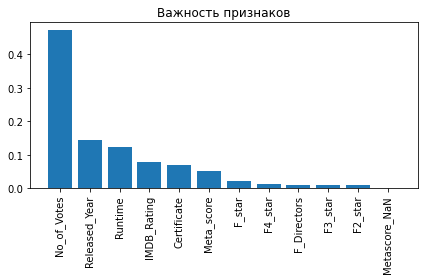

In [7]:
# Evaluation of the impact of parameters
feat_labels = df_imdb.columns[1:] 
importances = forest.feature_importances_
indices = np. argsort(importances)[::-1]
for f in range(val_X.shape[1]):
    print("%2d) %-*s%f" % (f + 1, 30,
                       feat_labels[indices[f]],
                       importances[indices[f]]))
plt.title('Важность признаков')
plt.bar(range(val_X.shape[1]),
        importances[indices],
        align='center' )
plt.xticks(range(val_X.shape[1]),feat_labels[indices], rotation=90)
plt.xlim([-1,val_X.shape[1]])
plt.tight_layout()
plt.show()